# results of simulation

In [1]:
import pandas as pd
import numpy as np
from glob import glob
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def get_simulation_data(path_name):
    records = []
    for path in glob(path_name):
        try:
            results = np.load(path)
            records.append(pd.DataFrame({
                "estimate": results["est_in"],
                "estimator": r"$\widehat{\tau}^{(1)}$",
                "tau": results["tau"],
                "prob": results["prob"],
                "ratio": results["ratio"],
                "model": results["model"],
                "dataset": results["dataset"],
            }))
            records.append(pd.DataFrame({
                "estimate": results["est_out"],
                "estimator": r"$\widehat{\tau}^{(2)}$",
                "tau": results["tau"],
                "prob": results["prob"],
                "ratio": results["ratio"],
                "model": results["model"],
                "dataset": results["dataset"],
            }))
            records.append(pd.DataFrame({
                "estimate": results["est"],
                "estimator": r"$\widehat{\tau}$",
                "tau": results["tau"],
                "prob": results["prob"],
                "ratio": results["ratio"],
                "model": results["model"],
                "dataset": results["dataset"],
            }))
        except:
            print(path)
    df = pd.concat(records, ignore_index=True)
    df.astype({'estimate': 'float', 'estimator': 'str', 'tau': 'float', 
               "prob": "float", "ratio": "float", "model": "str", "dataset": "str"}).dtypes
    df["prob"] = df['prob'].astype('float').round(2)
    df["ratio"] = df['ratio'].astype('float').round(2)
    return df

# all population experiments

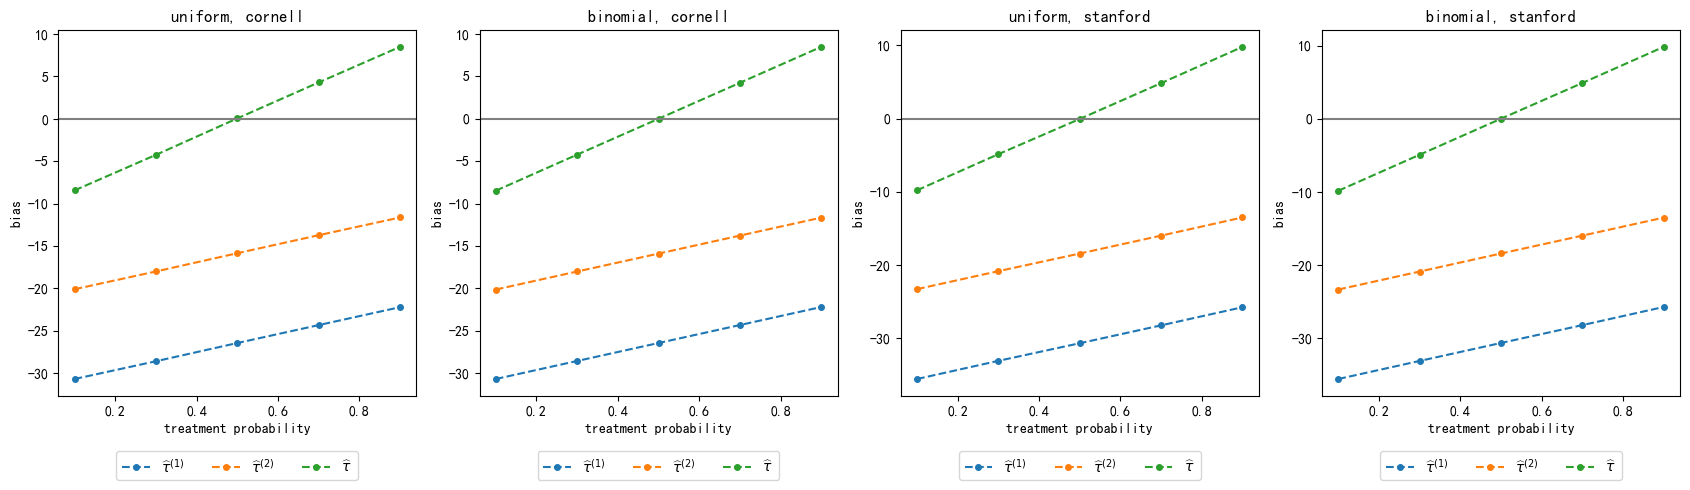

In [3]:
df1 = get_simulation_data("./results/all_population/cornell/*")
df2 = get_simulation_data("./results/all_population/stanford/*")
df = pd.concat([df1, df2], ignore_index=True)
models = ["uniform", "binomial"]
datasets = ["cornell", "stanford"]
plt.figure(figsize=(17, 5))
for dataset in datasets:
    for model in models:
        plt.subplot(1,4,1+models.index(model)+2*datasets.index(dataset))
        data = df[(df.model == model) & (df.dataset == dataset)].copy()
        data["estimate"] = data["estimate"] - data.tau.mean()
        # sns.boxplot(data=data, x="ratio", y="estimate", hue="estimator", width=0.5, palette="husl", whis=3)
        estimators = data.estimator.unique()
        for i, estimator in enumerate(estimators):
            tmp = data[data.estimator == estimator]
            est = tmp.groupby(["prob"], as_index=False).agg({"estimate": "mean"}).estimate.values
            se = tmp.groupby(["prob"], as_index=False).agg({"estimate": "std"}).estimate.values
            x = sorted(tmp.prob.unique())
            # plt.fill_between(x, est-se, est+se, alpha=0.2, color=f"C{i}")
            plt.plot(x, est, color=f"C{i}", label=estimator, linestyle='--', marker='o', markersize=4)
        plt.axhline(0, color='gray')
        plt.ylabel("bias")
        plt.xlabel("treatment probability")
        plt.legend(bbox_to_anchor=(0.5, -0.25), loc=8, ncol=3)
        plt.title(f"{model}, {dataset}")
        plt.tight_layout()
plt.savefig("./plots/simulation_all_population.pdf")
plt.show()

# sub population experiments

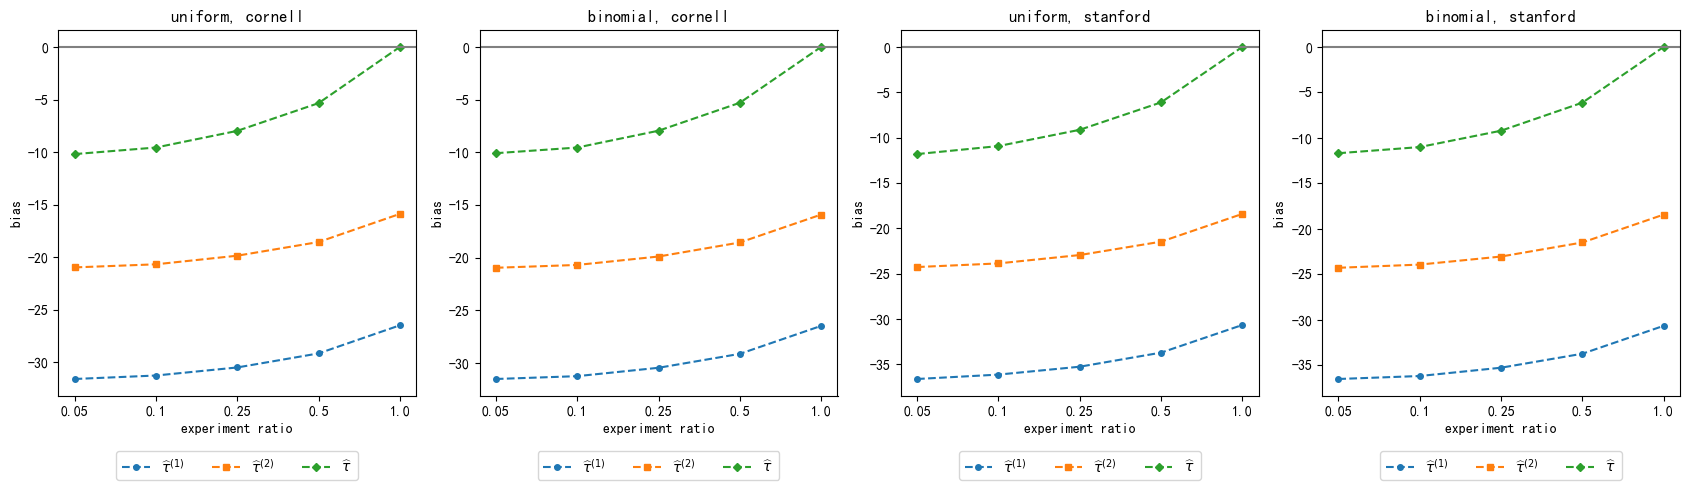

In [4]:
df1 = get_simulation_data("./results/sub_population/cornell/*")
df2 = get_simulation_data("./results/sub_population/stanford/*")
df = pd.concat([df1, df2], ignore_index=True)
models = ["uniform", "binomial"]
datasets = ["cornell", "stanford"]
plt.figure(figsize=(17, 5))
for dataset in datasets:
    for model in models:
        plt.subplot(1,4,1+models.index(model)+2*datasets.index(dataset))
        data = df[(df.model == model) & (df.dataset == dataset)].copy()
        data["estimate"] = data["estimate"] - data.tau.mean()
        estimators = data.estimator.unique()
        makers = ["o", "s", "D", "X", "^"]
        colors = ["C0", "C1", "C2", "C3", "C4"]
        for estimator, maker, color in zip(estimators, makers, colors):
            tmp = data[data.estimator == estimator]
            est = tmp.groupby(["ratio"], as_index=False).agg({"estimate": "mean"}).estimate.values
            se = tmp.groupby(["ratio"], as_index=False).agg({"estimate": "std"}).estimate.values
            ratios = sorted(tmp.ratio.unique())
            x = list(range(len(ratios)))
            plt.plot(x, est, color=color, label=estimator, linestyle='--', marker=maker, markersize=4)
            # plt.fill_between(x, est-se, est+se, alpha=0.2, color=color)
            plt.xticks(x, ratios)
        plt.axhline(0, color='gray')
        plt.ylabel("bias")
        plt.xlabel("experiment ratio")
        # plt.legend(loc=2)
        plt.legend(bbox_to_anchor=(0.5, -0.25), loc=8, ncol=3)
        plt.title(f"{model}, {dataset}")
        plt.tight_layout()
plt.savefig("./plots/simulation_sub_population.pdf")
plt.show()

# two-stage experiments vs Bernoulli experiments

In [6]:
df1 = get_simulation_data("./results/cluster_sub_population/cornell/*")
df2 = get_simulation_data("./results/cluster_sub_population/stanford/*")
df_all_1 = pd.concat([df1, df2], ignore_index=True)
df_all_1 = df_all_1[df_all_1.estimator == r"$\widehat{\tau}$"]
df_all_1["estimator"] = r"$\widehat{\tau}$ in two-stage expt"

df1 = get_simulation_data("./results/sub_population/cornell/*")
df2 = get_simulation_data("./results/sub_population/stanford/*")
df_all_2 = pd.concat([df1, df2], ignore_index=True)
df_all_2 = df_all_2[df_all_2.estimator == r"$\widehat{\tau}$"]
df_all_2["estimator"] = r"$\widehat{\tau}$ in simple expt"
df = pd.concat([df_all_1, df_all_2], ignore_index=True)

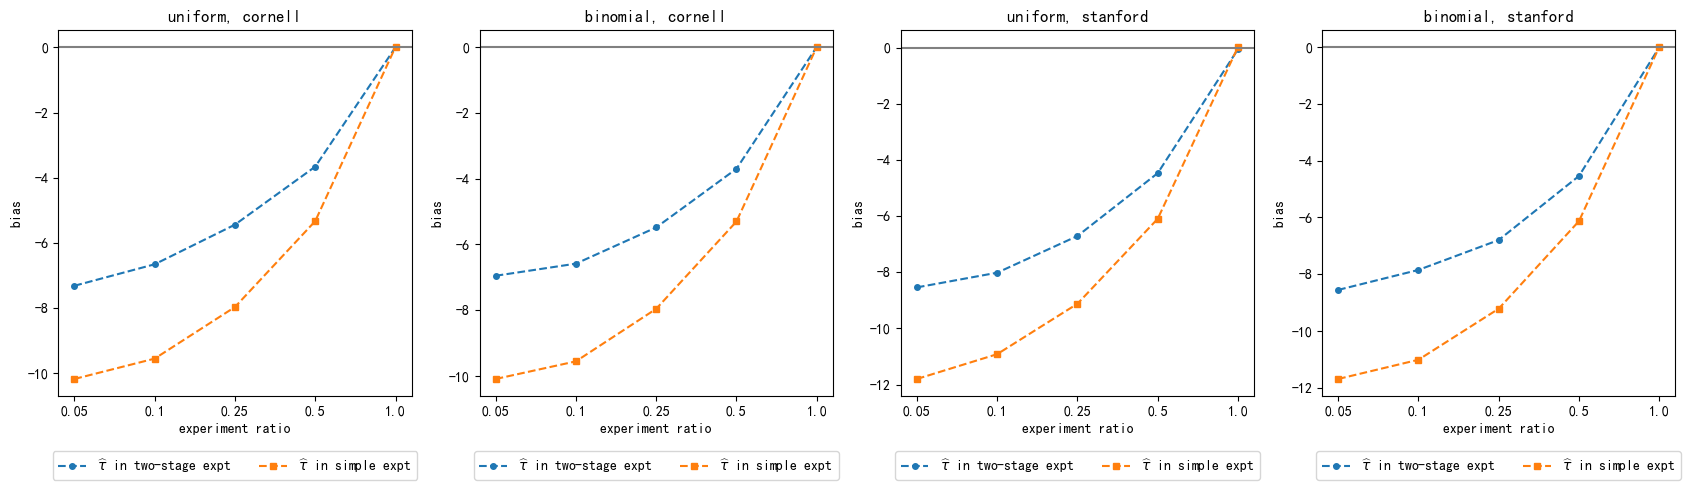

In [7]:
models = ["uniform", "binomial"]
datasets = ["cornell", "stanford"]
plt.figure(figsize=(17, 5))
for model in models:
    for dataset in datasets:
        plt.subplot(1,4,1+models.index(model)+2*datasets.index(dataset))
        data = df[(df.model == model) & (df.dataset == dataset)].copy()
        data["estimate"] = data["estimate"] - data.tau.mean()
        estimators = data.estimator.unique()
        makers = ["o", "s", "D", "X", "^"]
        colors = ["C0", "C1", "C2", "C3", "C4"]
        for estimator, maker, color in zip(estimators, makers, colors):
            tmp = data[data.estimator == estimator]
            est = tmp.groupby(["ratio"], as_index=False).agg({"estimate": "mean"}).estimate.values
            se = tmp.groupby(["ratio"], as_index=False).agg({"estimate": "std"}).estimate.values
            ratios = sorted(tmp.ratio.unique())
            x = list(range(len(ratios)))
            plt.plot(x, est, color=color, label=estimator, linestyle='--', marker=maker, markersize=4)
            # plt.fill_between(x, est-se, est+se, alpha=0.2, color=color)
            plt.xticks(x, ratios)
        plt.axhline(0, color='gray')
        plt.ylabel("bias")
        plt.xlabel("experiment ratio")
        # plt.legend(loc=2)
        plt.legend(bbox_to_anchor=(0.5, -0.25), loc=8, ncol=2)
        plt.title(f"{model}, {dataset}")
        plt.tight_layout()
plt.savefig("./plots/simulation_cluster_compare.pdf")
plt.show()